In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
words = open('names.txt').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
# Create a dictionary that maps words to indices and vice versa
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?
X,Y = [],[]
for w in words[:5]:
  print(w)
  context = [0] *block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join([itos[i] for i in context]), ' ---> ', itos[ix])
    context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
...  --->  e
..e  --->  m
.em  --->  m
emm  --->  a
mma  --->  .
olivia
...  --->  o
..o  --->  l
.ol  --->  i
oli  --->  v
liv  --->  i
ivi  --->  a
via  --->  .
ava
...  --->  a
..a  --->  v
.av  --->  a
ava  --->  .
isabella
...  --->  i
..i  --->  s
.is  --->  a
isa  --->  b
sab  --->  e
abe  --->  l
bel  --->  l
ell  --->  a
lla  --->  .
sophia
...  --->  s
..s  --->  o
.so  --->  p
sop  --->  h
oph  --->  i
phi  --->  a
hia  --->  .


In [9]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [10]:
C = torch.randn((27, 2))

In [11]:
C

tensor([[-0.8034,  0.1671],
        [ 0.9942,  1.2785],
        [-1.0383,  0.8042],
        [ 1.2667,  0.1766],
        [-0.8538, -1.1273],
        [-0.5151,  1.5356],
        [-1.7721, -0.2482],
        [-0.3083, -2.3052],
        [ 0.2921, -1.3342],
        [ 1.0367, -0.3451],
        [ 0.0941, -0.7293],
        [ 1.1687,  0.0216],
        [ 2.1830, -1.1274],
        [-0.1895,  0.6906],
        [ 0.6577,  0.1866],
        [-0.0578,  0.6215],
        [-0.4354, -0.5397],
        [ 0.5416,  0.2509],
        [ 0.1444,  0.7672],
        [ 1.9714, -1.0735],
        [ 1.5931, -0.8849],
        [-0.9215, -0.5432],
        [-0.1499, -0.2287],
        [ 0.0723,  1.1862],
        [ 0.1565, -1.1573],
        [-0.4382,  0.6582],
        [-0.1834,  0.4453]])

In [15]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [16]:
W1 = torch.randn((6, 100))
b1 = torch.randn((100))

In [17]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [18]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1).shape

torch.Size([32, 6])

In [20]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [21]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [22]:
a.shape

torch.Size([18])

In [24]:
a.view(9, 2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [27]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [28]:
h

tensor([[-0.5173, -0.9534, -0.1082,  ..., -0.9374,  0.9929,  0.5932],
        [-0.9548, -0.7758,  0.9891,  ..., -0.9546,  0.9037,  0.6368],
        [-0.1098, -0.9993,  0.6591,  ...,  0.7473,  0.9993,  0.9724],
        ...,
        [-0.4425,  0.4451, -0.5538,  ...,  0.3886,  0.9829, -0.8874],
        [ 0.9827,  0.9937, -0.6135,  ...,  0.7231,  0.5286,  0.3752],
        [ 0.9993,  0.9891, -0.5142,  ...,  0.9976, -0.6059,  0.9981]])

In [29]:
h.shape

torch.Size([32, 100])

In [30]:
W2 = torch.randn((100, 27))
b2 = torch.randn((27))

In [31]:
logits = h @ W2 + b2

In [32]:
logits.shape

torch.Size([32, 27])

In [33]:
logits

tensor([[-2.4372e+01,  8.6039e-01, -8.3316e+00,  9.7433e+00,  1.3142e+00,
         -4.3751e+00,  3.9360e+00, -2.8419e+00,  1.0571e+00, -2.2859e+00,
         -5.9338e+00,  9.7516e+00,  4.5135e+00,  1.5711e+00,  4.4787e+00,
          3.1927e+00,  1.3655e+00, -1.4133e+00,  3.0459e+00, -9.1242e+00,
         -1.8025e+00,  4.4394e+00, -2.6150e+00, -4.7345e+00,  5.7887e+00,
         -1.3931e+01,  9.1377e-02],
        [-1.7387e+01, -3.6454e+00, -1.0453e+01,  1.2018e+01,  5.0365e+00,
         -1.0708e+00,  2.2682e-01, -1.1021e+01,  4.5475e+00, -8.1835e+00,
         -2.6922e+00,  1.7548e+01,  7.1867e+00,  1.2350e+01,  8.0739e+00,
          2.4950e+00,  6.2692e+00,  6.5254e+00, -2.8187e+00, -2.8353e+00,
          2.8379e+00,  3.2806e+00, -3.5812e+00,  9.8640e-01,  3.8328e+00,
         -1.5770e+01,  1.0698e+00],
        [-1.3632e+01,  8.8402e+00,  5.8952e+00,  1.1722e+01, -5.3609e+00,
          2.3649e+00,  3.0755e+00,  8.5660e+00, -4.6143e+00,  1.0459e+00,
          5.8668e+00,  6.0951e+00, -3.72

In [34]:
counts = logits.exp()

In [35]:
prob = counts / counts.sum(dim=1, keepdim=True)

In [36]:
prob.shape

torch.Size([32, 27])

In [37]:
prob

tensor([[7.4509e-16, 6.7684e-05, 6.8939e-09, 4.8785e-01, 1.0655e-04, 3.6037e-07,
         1.4662e-03, 1.6696e-06, 8.2401e-05, 2.9113e-06, 7.5822e-08, 4.9191e-01,
         2.6121e-03, 1.3777e-04, 2.5229e-03, 6.9727e-04, 1.1216e-04, 6.9665e-06,
         6.0204e-04, 3.1205e-09, 4.7205e-06, 2.4257e-03, 2.0948e-06, 2.5157e-07,
         9.3507e-03, 2.5510e-11, 3.1370e-05],
        [6.6654e-16, 6.1904e-10, 6.8457e-13, 3.9305e-03, 3.6495e-06, 8.1259e-09,
         2.9745e-08, 3.8770e-13, 2.2380e-06, 6.6204e-12, 1.6058e-09, 9.9045e-01,
         3.1338e-05, 5.4770e-03, 7.6093e-05, 2.8738e-07, 1.2520e-05, 1.6175e-05,
         1.4151e-09, 1.3918e-09, 4.0493e-07, 6.3046e-07, 6.6013e-10, 6.3577e-08,
         1.0952e-06, 3.3592e-15, 6.9105e-08],
        [8.7330e-12, 5.0183e-02, 2.6397e-03, 8.9563e-01, 3.4126e-08, 7.7330e-05,
         1.5738e-04, 3.8148e-02, 7.2000e-08, 2.0679e-05, 2.5657e-03, 3.2237e-03,
         1.7439e-07, 5.6677e-03, 2.4448e-05, 6.6388e-07, 1.0692e-03, 2.3941e-09,
         4.7807e-

In [38]:
prob[0].sum()

tensor(1.0000)

In [44]:
loss = -prob[torch.arange(32), Y].log().mean()

In [40]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [39]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [45]:
loss

tensor(18.5504)

In [46]:
# clean up the code

In [ ]:
# old approach to build the dataset

In [68]:
block_size = 3 # context length: how many characters do we take to predict the next one?
X,Y = [],[]
for w in words:
  context = [0] *block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    context = context[1:] + [ix]
X = torch.tensor(X) 
Y = torch.tensor(Y)

In [80]:
# new approach to build the dataset
def build_dataset(words):
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X,Y = [],[]
  for w in words:
    context = [0] *block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]
  X = torch.tensor(X) 
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [136]:
# build the dataset using the new approach
import random
random.seed(42)
random.shuffle
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182778, 3]) torch.Size([182778])
torch.Size([22633, 3]) torch.Size([22633])
torch.Size([22735, 3]) torch.Size([22735])


In [137]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182778, 3]), torch.Size([182778]))

In [138]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn((200), generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn((27), generator=g)
params = [C, W1, b1, W2, b2]

In [139]:
sum(p.nelement() for p in params) # number of parameters

11897

In [140]:
for p in params: p.requires_grad = True

In [141]:
lri = []
lossi = []
stepi = []

In [142]:
for i in range(200000):
  #minbatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # embedding
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
  logits = h @ W2 + b2 # (32, 27)

  # manual way
  # counts = logits.exp()
  # prob = counts / counts.sum(dim=1, keepdim=True)
  # loss = -prob[torch.arange(32), Y].log().mean()\

  # using F.cross_entropy
  loss = F.cross_entropy(logits, Ytr[ix])
  # print(loss.item())
  # backward pass
  for p in params: p.grad = None
  loss.backward()
  lr = 0.1 if i < 100000 else 0.01
  for p in params: p.data += -lr * p.grad
  stepi.append(i)
  lossi.append(loss.log10().item())
print(loss.item())

1.9804692268371582


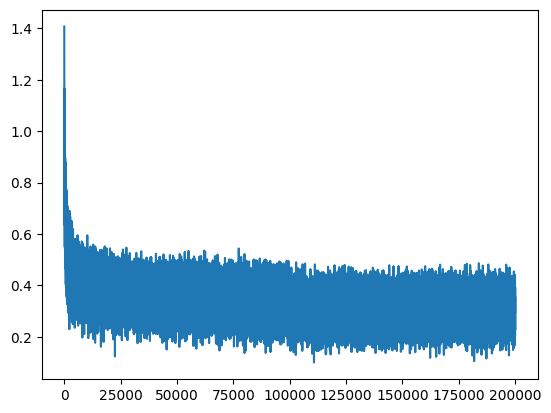

In [143]:
plt.plot(stepi, lossi)

In [144]:
# eval the loss on the dev set
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3856, grad_fn=<NllLossBackward0>)

In [145]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0717, grad_fn=<NllLossBackward0>)

In [74]:
torch.randint(0, X.shape[0], (32,))

tensor([118759,  34396, 170540,  44544,  13488,  91174,  87607, 115921, 217721,
          5421, 212706, 117681, 114920, 168167, 207393, 224105, 193651, 225589,
        130700, 174869, 153587,  39548,  85178, 193762, 148181, 174759, 170794,
        114230, 207222,  78499, 201757,  54474])